## Machine learning regression: predicting investments and its coefficients

### Import libraries and load data

In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
import statsmodels.formula.api as sm
import statsmodels.api as sm
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [2]:
##Importing data and creating dataframe 
df = pd.read_csv('firstout.csv')
df.head()

,Unnamed: 0,id,plant,size,number,auction,capacity,physical_guarantee,sold_lots,source,...,gkf,fdi,primary_energy_consumption,g,exch,inv_US$_billion,state,inv_size,physical_guarantee_size,distance_from_last_auction
0,0,1,UHE Foz do Rio Claro,0.091,11,Leilão 2/2005,68.4,41.0,41.0,hydro,...,17.204883,1.733901,8.86,84956.3,2.3399,0.120104543,GO,10918594.82,3.727273,0.798005
1,1,2,UHE São José,0.091,11,Leilão 2/2005,51.0,30.4,30.0,hydro,...,17.204883,1.733901,8.86,84956.3,2.3399,0.08931406,RS,8119460.00,2.763636,0.798005
2,2,3,UHE Passo São João,0.091,11,Leilão 2/2005,77.0,39.0,37.0,hydro,...,17.204883,1.733901,8.86,84956.3,2.3399,0.114362101,RS,10396554.64,3.545455,0.798005
3,3,4,UHE Simplício,0.091,11,Leilão 2/2005,337.7,191.3,185.0,hydro,...,17.204883,1.733901,8.86,84956.3,2.3399,0.616054447,RJ,56004949.73,17.390909,0.798005
4,4,5,UHE Retiro Baixo,0.091,11,Leilão 2/2005,82.0,38.5,36.0,hydro,...,17.204883,1.733901,8.86,84956.3,2.3399,0.112149186,MG,10195380.55,3.500000,0.798005


In [3]:
#Retrieving keys
df.keys()

Index(['Unnamed: 0', 'id', 'plant', 'size', 'number', 'auction', 'capacity',
       'physical_guarantee', 'sold_lots', 'source', 'company_consortium',
       'year', 'price_US$', 'inv_US$', 'gdp_growth', 'risk_embi', 'gkf', 'fdi',
       'primary_energy_consumption', 'g', 'exch', 'inv_US$_billion', 'state',
       'inv_size', 'physical_guarantee_size', 'distance_from_last_auction'],
      dtype='object')

In [3]:
#Removing unnecessary columns from dataframe 
df = df.drop(columns=['Unnamed: 0', 'id', 'plant', 'auction', 'capacity', 'sold_lots', 'company_consortium',
       'year', 'inv_US$_billion'])
df.head()

,size,number,physical_guarantee,source,price_US$,inv_US$,gdp_growth,risk_embi,gkf,fdi,primary_energy_consumption,g,exch,state,inv_size,physical_guarantee_size,distance_from_last_auction
0,0.091,11,41.0,hydro,46.172913,120104543.0,3.202131,398,17.204883,1.733901,8.86,84956.3,2.3399,GO,10918594.82,3.727273,0.798005
1,0.091,11,30.4,hydro,49.489294,89314060.0,3.202131,398,17.204883,1.733901,8.86,84956.3,2.3399,RS,8119460.00,2.763636,0.798005
2,0.091,11,39.0,hydro,48.100346,114362101.0,3.202131,398,17.204883,1.733901,8.86,84956.3,2.3399,RS,10396554.64,3.545455,0.798005
3,0.091,11,191.3,hydro,49.309800,616054447.0,3.202131,398,17.204883,1.733901,8.86,84956.3,2.3399,RJ,56004949.73,17.390909,0.798005
4,0.091,11,38.5,hydro,49.087568,112149186.0,3.202131,398,17.204883,1.733901,8.86,84956.3,2.3399,MG,10195380.55,3.500000,0.798005


### Encoding "source" as a dummy

In [4]:
df=pd.get_dummies(df, columns=['source'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1283 entries, 0 to 1282
Data columns (total 27 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   size                        1283 non-null   float64
 1   number                      1283 non-null   int64  
 2   physical_guarantee          1283 non-null   float64
 3   price_US$                   1283 non-null   float64
 4   inv_US$                     1281 non-null   float64
 5   gdp_growth                  1283 non-null   float64
 6   risk_embi                   1283 non-null   int64  
 7   gkf                         1283 non-null   float64
 8   fdi                         1283 non-null   float64
 9   primary_energy_consumption  1283 non-null   float64
 10  g                           1283 non-null   float64
 11  exch                        1283 non-null   float64
 12  state                       1283 non-null   object 
 13  inv_size                    1281 

In [6]:
# Dropping nan values
df = df.dropna()
df.head()

,size,number,physical_guarantee,price_US$,inv_US$,gdp_growth,risk_embi,gkf,fdi,primary_energy_consumption,...,source_biomass,source_coal,source_diesel oil,source_fuel oil,source_hydro,source_natural gas,source_others,source_solar,source_sugar cane bagasse,source_wind
0,0.091,11,41.0,46.172913,120104543.0,3.202131,398,17.204883,1.733901,8.86,...,0,0,0,0,1,0,0,0,0,0
1,0.091,11,30.4,49.489294,89314060.0,3.202131,398,17.204883,1.733901,8.86,...,0,0,0,0,1,0,0,0,0,0
2,0.091,11,39.0,48.100346,114362101.0,3.202131,398,17.204883,1.733901,8.86,...,0,0,0,0,1,0,0,0,0,0
3,0.091,11,191.3,49.309800,616054447.0,3.202131,398,17.204883,1.733901,8.86,...,0,0,0,0,1,0,0,0,0,0
4,0.091,11,38.5,49.087568,112149186.0,3.202131,398,17.204883,1.733901,8.86,...,0,0,0,0,1,0,0,0,0,0


### Evaluating the most suitable models for regression 

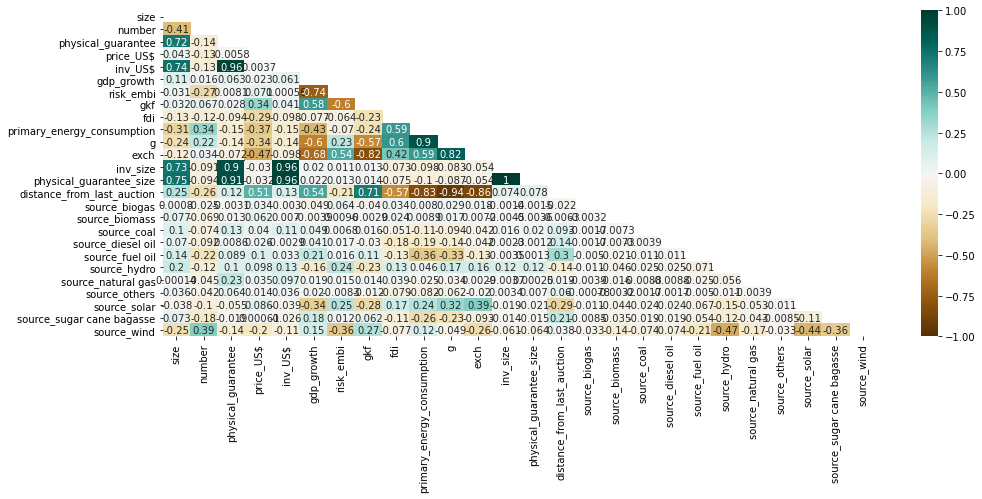

In [7]:
# Once again looking at the heatmap
plt.figure(figsize=(16, 6))
mask = np.triu(np.ones_like(df.corr(), dtype=np.bool))
heatmap = sns.heatmap(df.corr(), mask=mask, vmin=-1, vmax=1, annot=True, cmap='BrBG')

#### The main conclusion from the heatmap's evaluation is that physical capacity and investments are highly correlated. To avoid collinearity, it is possible to assign one as the dependent variable and the other as one of the independent variable. But they should not be both independent variables.

In [8]:
# Evaluate the first model: inv_US$, G, risk_embi, primary_energy_consumption, physical_guarantee, exch
Y = df['inv_US$']
X = df[['g', 'risk_embi', 'primary_energy_consumption', 'physical_guarantee', 'exch']]
X = sm.add_constant(X)
model = sm.OLS(Y,X)
result = model.fit()
print(result.params)
print(result.summary())

const                         2.248167e+08
g                             7.176014e+02
risk_embi                     1.497169e+05
number                        4.525879e+04
primary_energy_consumption   -2.500197e+07
physical_guarantee            2.107902e+06
exch                         -5.655287e+07
dtype: float64
                            OLS Regression Results                            
Dep. Variable:                inv_US$   R-squared:                       0.929
Model:                            OLS   Adj. R-squared:                  0.929
Method:                 Least Squares   F-statistic:                     2787.
Date:                Wed, 19 May 2021   Prob (F-statistic):               0.00
Time:                        14:41:39   Log-Likelihood:                -25399.
No. Observations:                1281   AIC:                         5.081e+04
Df Residuals:                    1274   BIC:                         5.085e+04
Df Model:                           6               

In [9]:
# Evaluate the second model: inv_US$, G, risk_embi, primary_energy_consumption, physical_guarantee, exch, and "source" dummies
Y = df['inv_US$']
X = df[['g', 'risk_embi', 'primary_energy_consumption', 'physical_guarantee', 'exch', 'source_biomass', 'source_coal', 'source_diesel oil', 'source_fuel oil', 'source_hydro', 'source_natural gas', 'source_others', 'source_solar', 'source_sugar cane bagasse', 'source_wind']]
X = sm.add_constant(X)
model = sm.OLS(Y,X)
result = model.fit()
print(result.params)
print(result.summary())

const                         2.684435e+08
g                             2.109925e+02
risk_embi                     1.851073e+04
primary_energy_consumption   -2.130335e+07
physical_guarantee            2.175221e+06
exch                         -2.601736e+07
source_biomass               -1.984638e+07
source_coal                  -1.419720e+08
source_diesel oil            -1.038635e+08
source_fuel oil              -1.410871e+08
source_hydro                  3.004848e+07
source_natural gas           -3.365284e+08
source_others                -3.935328e+08
source_solar                  3.418543e+07
source_sugar cane bagasse    -2.042111e+07
source_wind                   7.633046e+06
dtype: float64
                            OLS Regression Results                            
Dep. Variable:                inv_US$   R-squared:                       0.949
Model:                            OLS   Adj. R-squared:                  0.949
Method:                 Least Squares   F-statistic:        

In [10]:
# Evaluate the third model: inv_size, G, risk_embi, primary_energy_consumption, physical_guarantee, exch
Y = df['inv_size']
X = df[['g', 'risk_embi', 'primary_energy_consumption', 'physical_guarantee', 'exch']]
X = sm.add_constant(X)
model = sm.OLS(Y,X)
result = model.fit()
print(result.params)
print(result.summary())

const                        -7.188328e+07
g                             6.185174e+02
risk_embi                     1.751968e+05
primary_energy_consumption   -4.982468e+06
physical_guarantee            1.909364e+06
exch                         -4.502703e+07
dtype: float64
                            OLS Regression Results                            
Dep. Variable:               inv_size   R-squared:                       0.817
Model:                            OLS   Adj. R-squared:                  0.816
Method:                 Least Squares   F-statistic:                     1135.
Date:                Wed, 19 May 2021   Prob (F-statistic):               0.00
Time:                        08:41:14   Log-Likelihood:                -25958.
No. Observations:                1281   AIC:                         5.193e+04
Df Residuals:                    1275   BIC:                         5.196e+04
Df Model:                           5                                         
Covariance Type:

In [9]:
# Evaluate the fourth model: inv_size, G, risk_embi, primary_energy_consumption, physical_guarantee_size, exch, and "source" dummies
Y = df['inv_size']
X = df[['g', 'risk_embi', 'physical_guarantee', 'primary_energy_consumption', 'exch', 'source_biomass', 'source_coal', 'source_diesel oil', 'source_fuel oil', 'source_hydro', 'source_natural gas', 'source_others', 'source_solar', 'source_sugar cane bagasse', 'source_wind']]
X = sm.add_constant(X)
model = sm.OLS(Y,X)
result = model.fit()
print(result.params)
print(result.summary())




const                         3.167837e+07
g                            -8.092606e+00
risk_embi                     5.816034e+04
physical_guarantee            2.057332e+06
primary_energy_consumption   -6.480677e+06
exch                         -1.672746e+05
source_biomass               -6.885141e+07
source_coal                  -6.421635e+08
source_diesel oil            -9.699985e+07
source_fuel oil              -2.121295e+08
source_hydro                 -1.631995e+06
source_natural gas           -5.874453e+08
source_others                -7.863810e+08
source_solar                  1.820590e+07
source_sugar cane bagasse    -1.670355e+07
source_wind                   9.394476e+06
dtype: float64
                            OLS Regression Results                            
Dep. Variable:               inv_size   R-squared:                       0.884
Model:                            OLS   Adj. R-squared:                  0.883
Method:                 Least Squares   F-statistic:        

### Decisions for the Model:
***
- Although models 2 has a higher R2, model 1 has the lowest p values for the variables. In short, it appears to be better formulated.
- This is confirmed by its relatively high f-statistic, which assesses how all variables fit together. It is the highest of all values.
- The dummies in general have very high p-values. 
- The Model 1 is the chose one for the ML models.


### Preparing the model with the chosen variables

In [12]:
# Dropping variables that have been outsourced
df2 = df.drop(columns=['fdi', 'gkf', 'gdp_growth', 'size', 'inv_size', 'physical_guarantee_size', 'source_biogas', 'source_biomass', 'source_coal', 'source_diesel oil', 'source_fuel oil', 'source_hydro', 'source_natural gas', 'state', 'price_US$', 'distance_from_last_auction', 'source_others', 'source_solar', 'source_sugar cane bagasse', 'source_wind'])
df2.head()

,physical_guarantee,inv_US$,risk_embi,primary_energy_consumption,g,exch
0,41.0,120104543.0,398,8.86,84956.3,2.3399
1,30.4,89314060.0,398,8.86,84956.3,2.3399
2,39.0,114362101.0,398,8.86,84956.3,2.3399
3,191.3,616054447.0,398,8.86,84956.3,2.3399
4,38.5,112149186.0,398,8.86,84956.3,2.3399


In [14]:
# Changing the "inv_US$" variable's position
df2=df2[['physical_guarantee', 'risk_embi', 'primary_energy_consumption', 'g', 'exch', 'inv_US$']]


In [15]:
#Splitting the data into independent and dependent variables
X = df2.iloc[:,0:5].values 
y = df2.iloc[:,5].values
print('The independent features set: ')
print(X[:5,:])
print('The dependent variable: ')
print(y[:5])

The independent features set: 
[[4.10000e+01 3.98000e+02 8.86000e+00 8.49563e+04 2.33990e+00]
 [3.04000e+01 3.98000e+02 8.86000e+00 8.49563e+04 2.33990e+00]
 [3.90000e+01 3.98000e+02 8.86000e+00 8.49563e+04 2.33990e+00]
 [1.91300e+02 3.98000e+02 8.86000e+00 8.49563e+04 2.33990e+00]
 [3.85000e+01 3.98000e+02 8.86000e+00 8.49563e+04 2.33990e+00]]
The dependent variable: 
[1.20104543e+08 8.93140600e+07 1.14362101e+08 6.16054447e+08
 1.12149186e+08]


### Split the data into training and testing sets

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.15, random_state = 42)

### First take: linear regression

#### Step 1: Running the model

In [17]:
lin_model = LinearRegression()
lin_model.fit(X_train, y_train)

LinearRegression()

#### Step 2: Obtaining the intercept

In [18]:
lin_model.intercept_

251859563.24350765

#### Step 3: Obtaining the coefficients

In [19]:
lin_model.coef_


array([ 2.12011819e+06,  1.10299045e+05, -2.67987652e+07,  7.39739413e+02,
       -5.65555171e+07])

#### Step 4: Presenting the predictions array

In [20]:
predictions  = lin_model.predict(X_test)
predictions

array([ 2.21530214e+07,  5.27622027e+07,  2.02449151e+07,  3.89814345e+07,
        2.51191888e+07,  1.03726809e+07,  8.00012925e+07,  3.57275453e+07,
        1.29824070e+08,  1.53075553e+07,  1.95477917e+07,  7.97892807e+07,
       -7.71395713e+06,  3.80604405e+07,  1.41023398e+07, -2.82197087e+06,
        5.39043938e+07,  3.97480043e+07,  9.06664333e+08,  4.01959182e+07,
        3.99600162e+07,  3.40236852e+07,  4.69564062e+07,  1.50955435e+07,
        3.68037291e+07,  2.15227534e+07,  5.67904273e+07,  4.64212331e+05,
        2.01536913e+08,  3.91119689e+07,  4.72498954e+07,  4.32216709e+07,
        1.06432953e+07,  5.62554376e+07,  1.84877326e+07,  2.44831533e+07,
        2.21196250e+08,  2.20662186e+07,  3.17154454e+07,  3.00032262e+07,
        6.13442524e+07,  1.10476485e+09,  5.42462855e+07,  2.00226830e+08,
        3.51076345e+07,  1.02803596e+07,  7.89940811e+07,  5.77104039e+06,
        3.25396025e+07,  5.40342736e+07,  5.96771153e+07,  5.95465809e+07,
        3.68085249e+07,  

#### Step 5: Calculating the r2 score

In [21]:
r2 = r2_score(y_test, predictions)
r2

0.5952042011574099

#### Step 6: Calculating the RMSE

In [22]:
import math 
mse = mean_squared_error(y_test, predictions)
rmse = math.sqrt(mse)
print(rmse)

76372874.19339459


#### Step 7: Plotting actual vs predicted investments

C:\Users\kaypa\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\kaypa\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


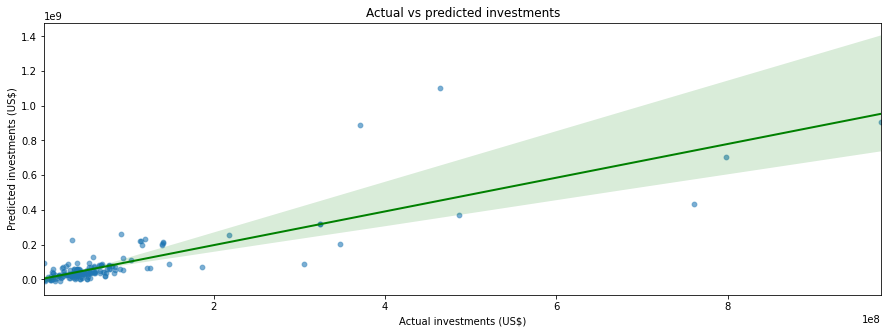

In [23]:
plt.figure(figsize=(15, 5))
sns.scatterplot(y_test, predictions, alpha=0.4)
sns.regplot(y_test, predictions, truncate=True, scatter_kws={'s': 20, 'alpha':0.3}, line_kws={'color':'green', 'linewidth': 2})
 
plt.xlabel("Actual investments (US$)")
plt.ylabel("Predicted investments (US$)")
plt.title("Actual vs predicted investments")
 
plt.show()

### Second take: polynomial regression

In this section, the model from the previous section is converted into a Polynomial model of order 2. After this, a regression model is run and predictions are obtained.


#### Step 1: This function permits to transform the previous model into higher polynomial features and to obtain the test statistics in one take

In [24]:
def create_polynomial_regression_model(degree):
  
  poly_features = PolynomialFeatures(degree=degree)
  
  # With this line of code, the previous's section model is transformed into higher features
  X_train_poly = poly_features.fit_transform(X_train)
  
  # The transformed features are fitted to a polinomial regression
  poly_model = LinearRegression()
  poly_model.fit(X_train_poly, y_train)
  
  # A prediction on the training data set is conducted
  y_train_predicted = poly_model.predict(X_train_poly)
  
  # A prediciton on the test data set is carried out
  y_test_predict = poly_model.predict(poly_features.fit_transform(X_test))
  
  # The training dataset is evaluated
  rmse_train = np.sqrt(mean_squared_error(y_train, y_train_predicted))
  r2_train = r2_score(y_train, y_train_predicted)
  
  # Model'S evaluation on the test data set
  rmse_test = np.sqrt(mean_squared_error(y_test, y_test_predict))
  r2_test = r2_score(y_test, y_test_predict)
  
  print("The model's performance for the training set")
  print("-------------------------------------------")
  print("Training set's RMSE is {}".format(rmse_train))
  print("Training set's R_2 score is {}".format(r2_train))
  
  print("\n")
  
  print("The model performance for the test set")
  print("-------------------------------------------")
  print("Testing set's RMSE is {}".format(rmse_test))
  print("Testing set's R_2 score is {}".format(r2_test))  
    
create_polynomial_regression_model(2)

The model's performance for the training set
-------------------------------------------
Training set's RMSE is 47459794.70021668
Training set's R_2 score is 0.9859119070281579


The model performance for the test set
-------------------------------------------
Testing set's RMSE is 55310725.52254992
Testing set's R_2 score is 0.7876870733256429


#### Step 2: obtaining the predicted value

In [25]:
degree=2
poly_features = PolynomialFeatures(degree=degree)
X_train_poly = poly_features.fit_transform(X_train)
poly_model = LinearRegression()
poly_model.fit(X_train_poly, y_train)
y_train_predicted = poly_model.predict(X_train_poly)
y_test_predict = poly_model.predict(poly_features.fit_transform(X_test))
y_test_predict 

array([ 3.21275108e+07,  4.47355124e+07,  3.16400468e+07,  3.59017920e+07,
        3.25745948e+07,  3.54203889e+07,  7.67327962e+07,  4.89246051e+07,
        1.30505539e+08,  3.30953704e+07,  3.43243704e+07,  7.65040233e+07,
       -1.23764590e+07, -3.00182241e+07,  3.93331650e+07,  2.57497187e+07,
        2.98313759e+07,  4.29663921e+07,  6.62201531e+08,  5.10396029e+07,
        4.31170119e+07,  3.88998093e+07,  4.80876899e+07,  3.30339246e+07,
        4.80555846e+07,  4.26238753e+07,  4.73179967e+07,  2.65885840e+07,
        1.93085500e+08,  4.25145351e+07,  4.12018210e+07,  3.86196794e+07,
        3.17436555e+07,  7.51037148e+07,  3.40171054e+07,  3.21228208e+07,
        1.69722342e+08,  3.04061126e+07,  4.35797497e+07,  4.63852885e+07,
        5.66023178e+07,  7.24088343e+08,  4.56869371e+07,  1.78052534e+08,
        4.65636140e+07,  2.90949295e+07,  8.51766115e+07, -6.52042533e+07,
        3.78455578e+07,  4.55510181e+07,  5.71264047e+07,  4.90850431e+07,
        2.43793248e+07,  

#### Step 3: Obtaining the intercept

In [26]:
poly_model.intercept_

-1104134395.476201

#### Step 4: obtaining the coefficients

In [27]:
poly_model.coef_

array([ 0.00000000e+00,  6.79767337e+06, -1.71987448e+07,  1.37345398e+08,
       -1.28072090e+04,  3.93137201e+09,  2.00457702e+01, -3.09063920e+02,
       -3.67793578e+05,  3.66680180e+00, -7.41745709e+05, -2.28135434e+03,
        2.13423301e+06, -3.78976619e+01,  1.58016620e+06, -1.23107938e+07,
        2.30547887e+03, -4.54068415e+08, -4.68931674e-02,  8.50885207e+03,
       -2.59527605e+08])

### Third take: random forest

#### Downside of the approach: no way of analyzing coefficients in a meaningful manner. It is only for predictions.

#### Step 1: create regressor object

In [29]:
regressor = RandomForestRegressor(n_estimators = 100, max_depth= 5, random_state = 0) 


#### Step 2: fit the regressor with x and y data

In [30]:
regressor.fit(X_train,y_train)

RandomForestRegressor(max_depth=5, random_state=0)

#### Step 3: making predictions on test data set with Random Forest model

In [31]:
predictions_rf_test = regressor.predict(X_test)
predictions_rf_test

array([4.22310793e+07, 4.18539447e+07, 4.22310793e+07, 2.56936797e+07,
       3.56905716e+07, 4.03017599e+07, 7.23088379e+07, 4.23514143e+07,
       7.26975108e+07, 4.22310793e+07, 4.22310793e+07, 7.23088379e+07,
       4.60152599e+07, 6.02991754e+07, 4.04220949e+07, 2.54750979e+07,
       2.58384642e+07, 4.22310793e+07, 5.89742930e+08, 4.42902210e+07,
       4.22310793e+07, 4.11643698e+07, 4.22310793e+07, 4.22310793e+07,
       4.42902210e+07, 4.21907853e+07, 4.22310793e+07, 2.54750979e+07,
       1.56104343e+08, 4.22310793e+07, 4.03017599e+07, 3.62557856e+07,
       4.19612686e+07, 7.25338309e+07, 4.22310793e+07, 3.32808731e+07,
       1.43292894e+08, 2.56936797e+07, 4.36928766e+07, 4.23514143e+07,
       4.85150505e+07, 5.35586208e+08, 4.20704503e+07, 1.42554371e+08,
       4.42902210e+07, 3.81587520e+07, 4.45314515e+07, 4.11245948e+07,
       4.06580080e+07, 4.20704503e+07, 4.24723098e+07, 4.22310793e+07,
       6.13874283e+07, 6.27068094e+07, 7.06641753e+07, 2.54750979e+07,
      

#### Step 4: Calculating the R2 score

In [32]:
r2 = r2_score(y_test, predictions_rf_test)
r2

0.7959630654181644

#### Step 5: Calculating the RMSE

In [33]:
mse = mean_squared_error(y_test, predictions_rf_test)
rmse = math.sqrt(mse)
print(rmse)

54221999.893495895


#### Step 6: Plotting actual vs predicted investments

C:\Users\kaypa\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\kaypa\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


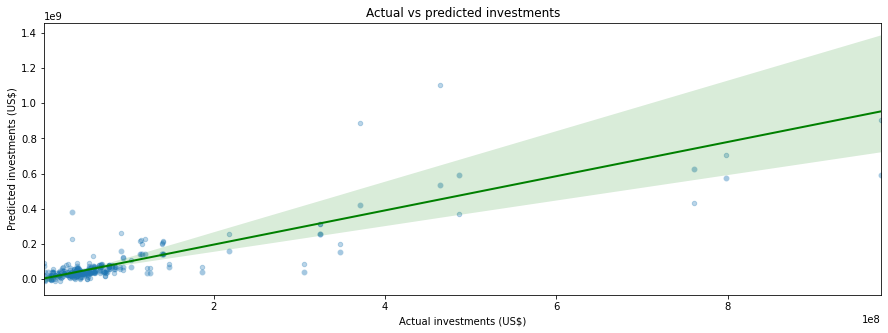

In [34]:
plt.figure(figsize=(15, 5))
sns.scatterplot(y_test, predictions_rf_test, alpha=0.4)
sns.regplot(y_test, predictions, truncate=True, scatter_kws={'s': 20, 'alpha':0.3}, line_kws={'color':'green', 'linewidth': 2})
 
plt.xlabel("Actual investments (US$)")
plt.ylabel("Predicted investments (US$)")
plt.title("Actual vs predicted investments")
 
plt.show()

### Comparing the mean predicted values with actual values

#### Actual values' mean

In [35]:
df3=df2[['inv_US$']]
df3["inv_US$"].mean()


80134187.0757221

#### Y test mean

In [36]:
y_test.mean()

74614238.12953368

#### Linear regression results' mean

In [37]:
predictions.mean()

74959601.50514868

#### Polynomial regression results' mean

In [38]:
y_test_predict.mean()

70446797.30585282

#### Random forest results' mean

In [39]:
predictions_rf_test.mean()

71195097.4240863

### Findings
***
- In terms of R2, the RandomForest (0.796) outperforms the Polynomial of order 2 (0.788) and the Linear Regression models (0.595)
- It also does it in terms of RMSE: 54221999 < 55310725 < 76372874
- This suggests that the RandomForest model tends to be the most suitable one to make predictions of the variable "inv_US$". 


- The downside of the RandomForest regression modeling approach is its treatment of the model coefficients. This is a key variable for policymakers and investors alike in their decisionmaking approach. On the other hand, it should be acknowledged that ML models' focus is set on making predicitions, and not in presenting the coefficients (which Panel Models probably can do even better)
- It appears that both the polynomial and the Random forest do a good job (more than the linear regresssion) of estimating what the average investments could be like by extrapolation. What these models' results suggest is that the average investments will tend to fall, in line with the findings obtained in the classification problem.
- When the RandomForest' parameter are tuned, predicitions below the US$55 million mark for average investments are reached. However, this comes at the cost of a much lower R2 and RMSE. 